This project analyses exit surveys from the Department of Education, Training and Employment and the Technical and Further Education Institute in Queensland, Australia. Both datasets are CSV files, which I will use to answer the following question -- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer? Are younger employees resigning due to some kind of dissatisfaction? What about older employees? Neither dataset comes with a data dictionary explaining what each column contains, so the analysis primarily focuses on cleaning the data and dealing with null values.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [2]:
#Included the following code so Jupyter Notebook would not truncate any dataframe with more than 20 columns
pd.options.display.max_columns = 999

General Description of Department of Education, Training and Employment (DETE) dataset

In [3]:
#Dimensions of the DETE dataset
dete_survey.shape

(822, 56)

In [4]:
#Display counts of all non-null values
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [5]:
#Display counts of null values
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

The cells above show the basic structure of the Department of Education, Training and Employment dataset. Overall, there are 822 rows in the dataset. The total number of values in the ID column is 822 with 0 null values, as would be expected since every employee taking the survey has an ID number. The last five columns inquire into the employee's ethnic background. The only non-null values for these columns are "Yes" responses if the employee taking the survey identifies with the group named in the column. The columns ranging from 'Professional Development' to 'Health & Safety' could be dropped, since, in the absence of a Data Dictionary, the one letter responses in these columns are incoherent and will be of no help in the analysis. Given the questions posed in the initial markdown cell above, the only columns that have any direct relevance to the inquiries at hand are those dealing with an employee's age, length of time at the company, and self-reported job (dis)satisfaction, i.e. The column 'DETE Start Date' seems to indicate the year the employee started and the 'Cease Date' column the month and year employment ended. 'Role Start Date' seems to show when the employee's last held position began, and is not relevant to this inquiry. Assessing job satisfaction can be completed by examining the binary responses (True or False) in the columns ranging from 'Interpersonal Conflicts' to 'None of the above,' which appear to ask whether or not each feature of the job, listed in the column heading, was problematic for the employee. Given that the inquiry asks if job dissatisfaction was a reason for the employee leaving and not what dissatisfaction consisted of, these columns could possibly be collapsed into one column containing a True or False value for whether at least one True value appeared in the aforementioned column range or a sum of True responses. The column 'SeparationType' can be used to help sort and filter the reasons why employee's left the company.

In [6]:
#View of the first five rows of data
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [7]:
#Counts of values that describe former employees' reasons for leaving the company
dete_survey['SeparationType'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64

General Description of Technical and Further Education (TAFE) Institute dataset

In [8]:
#Dimensions of the TAFE dataset
tafe_survey.shape

(702, 72)

In [9]:
#Display counts of all non-null values
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [10]:
#Display counts of all null values
tafe_survey.isnull().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

The TAFE dataset also has a 'Record ID' column, which is similar to the DETE dataset's 'ID' column in that it can serve as a primary key (a unique value for each row) and contains no null values. The dataset contains 702 rows, but has 16 more columns than the DETE dataset. While there is a column documenting the year employment ended ('CESSATION YEAR'), there is no column showing start year. To include this information, the column 'LengthofServiceOverall...' (shortened for brevity's sake) will have to be deducted from the termination year. The questionnaire portion of the survey, aimed at collecting demographic and job satisfaction data, contains questions similar in content to the DETE survey, but the responses are categorical rather than binary for many of the questions -- that is, the answers contain a range of values from Strongly Disagree to Strongly Agree values for a majority of the questions and only a few contain Yes/No values. Combining these datasets would be possible, if the job satisfaction questions could be reduced to a single value, and the termination type column normalized to allow for easier filtering and sorting.

In [11]:
#View of the first five rows of data
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

In [12]:
#Counts of values that describe former employees' reasons for leaving the company
tafe_survey['Reason for ceasing employment'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: Reason for ceasing employment, dtype: int64

In [13]:
#Given that many of the values in the dete_survey.csv file were "Not Stated," 
#I will re-read the csv back into a dataframe, 
#but specify that the "Not Stated" values should be treated/displayed as null/NaN.
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

In [14]:
#Dropping columns that are irrelevant to the analysis
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

In [15]:
#Number of null values remaining after dropping unnecessary columns
dete_survey_updated.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                              34
DETE Start Date                         73
Role Start Date                         98
Position                                 5
Classification                         367
Region                                 105
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [16]:
#Number of null values remaining after dropping unnecessary columns
tafe_survey_updated.isnull().sum()

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
Contributing Factors. Career Move - Public Sector                            265
Contributing Factors. Career Move - Private Sector                           265
Contributing Factors. Career Move - Self-employment                          265
Contributing Factors. Ill Health                                             265
Contributing Factors. Maternity/Family                                       265
Contributing Factors. Dissatisfaction                                        265
Contributing Factors. Job Dissatisfaction                                    265
Contributing Factors. Interp

In [17]:
#Normalizing column names in TAFE dataset to match DETE dataset
tafe_rename = {'Record ID':'ID', 'CESSATION YEAR':'cease_date', 'Reason for ceasing employment':'separationtype','Gender. What is your Gender?':'gender','CurrentAge. Current Age':'age','Employment Type. Employment Type':'employment_status','Classification. Classification':'position','LengthofServiceOverall. Overall Length of Service at Institute (in years)':'institute_service'}
tafe_survey_updated = tafe_survey_updated.rename(tafe_rename,axis=1)

In [18]:
#Normalizing column name formatting in TAFE dataset to match DETE dataset
tafe_survey_updated.columns = tafe_survey_updated.columns.str.replace(' ','_').str.lower().str.replace('.','').str.strip()
tafe_survey_updated

,id,institute,workarea,cease_date,separationtype,contributing_factors_career_move_-_public_sector_,contributing_factors_career_move_-_private_sector_,contributing_factors_career_move_-_self-employment,contributing_factors_ill_health,contributing_factors_maternity/family,contributing_factors_dissatisfaction,contributing_factors_job_dissatisfaction,contributing_factors_interpersonal_conflict,contributing_factors_study,contributing_factors_travel,contributing_factors_other,contributing_factors_none,gender,age,employment_status,position,institute_service,lengthofservicecurrent_length_of_service_at_current_workplace_(in_years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,-,-,-,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,-,-,-,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4
8,6.341579e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2009.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Female,36 40,Temporary Full-time,Tutor,3-4,3-4
9,6.341588e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,Career Move - Public Sector,-,-,-,-,-,-,-,-,-,Other,-,Female,21 25,Permanent Full-time,Administration (AO),1-2,1-2


In [19]:
#Normalizing column name formatting in DETE dataset
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.replace(' ','_').str.strip() 

In [20]:
#Reviewing the unique values in the 'separationtype' column of the DETE survey
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [21]:
#Reviewing the unique values in the 'separationtype' column of the TAFE survey
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [22]:
#Using boolean indexing to filter the 'separationtype' column in DETE survey based off of a regex string match vector operation
match_text = dete_survey_updated['separationtype'].str.match(r'(Resignation-)').copy()
dete_resignations = dete_survey_updated.loc[match_text]
#Filtering TAFE dataset to only display employees who resigned
tafe_resignations = tafe_survey_updated.loc[tafe_survey_updated['separationtype']=='Resignation'].copy()
#copy method is appended to each dataframe to avoid the SettingWithCopy Warning

In [23]:
#Using vectorized string method to extract only the years
#and converting them to float data type
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.replace(r'([0-9]{2}/)','').astype(float)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


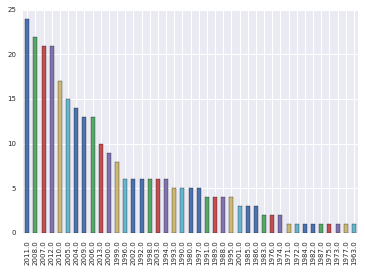

In [24]:
dete_resignations['dete_start_date'].value_counts().plot(kind='bar',fontsize=7)

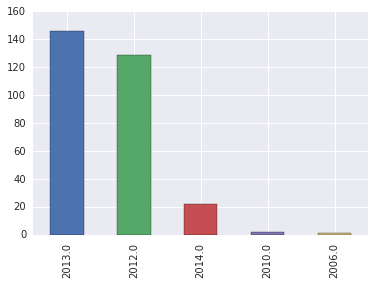

In [25]:
dete_resignations['cease_date'].value_counts().plot(kind='bar')

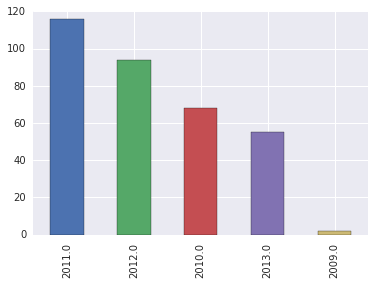

In [26]:
tafe_resignations['cease_date'].value_counts().plot(kind='bar')

Both datasets don't contain any resignation years prior to 2006 with most values stacking up around 2012.

In [27]:
dete_resignations['institute_service'] = dete_resignations['cease_date']-dete_resignations['dete_start_date']

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [28]:
# Using the difference of the 'cease_date' and 'dete_start_date',
# I created a new column, 'institute_service', to more easily identify employees
# who only worked at the company a short period of time. 
dete_resignations['institute_service'].value_counts()

5.0     23
1.0     22
3.0     20
0.0     20
6.0     17
4.0     16
9.0     14
2.0     14
7.0     13
13.0     8
8.0      8
20.0     7
15.0     7
10.0     6
22.0     6
14.0     6
17.0     6
12.0     6
16.0     5
18.0     5
23.0     4
11.0     4
24.0     4
39.0     3
19.0     3
21.0     3
32.0     3
28.0     2
26.0     2
25.0     2
30.0     2
36.0     2
29.0     1
33.0     1
42.0     1
27.0     1
41.0     1
35.0     1
38.0     1
34.0     1
49.0     1
31.0     1
Name: institute_service, dtype: int64

In [29]:
#Converting values in job dissatisfaction columns to Boolean values
update_vals = {'Contributing Factors. Dissatisfaction ': True,
               'Job Dissatisfaction': True,
               '-': False}
tafe_resignations['contributing_factors_dissatisfaction'] = tafe_resignations['contributing_factors_dissatisfaction'].map(update_vals)
tafe_resignations['contributing_factors_job_dissatisfaction'] = tafe_resignations['contributing_factors_job_dissatisfaction'].map(update_vals)

In [30]:
#Using the any() method to check for True values in job dissatisfaction columns
#and creating a new column, 'dissatisfied', if True appears in either column
tafe_resignations['dissatisfied'] = tafe_resignations[['contributing_factors_dissatisfaction','contributing_factors_job_dissatisfaction']].any(axis='columns')

In [31]:
#View of columns to check if any() method worked properly
tafe_resignations[['contributing_factors_dissatisfaction','contributing_factors_job_dissatisfaction','dissatisfied']].head(10)

,contributing_factors_dissatisfaction,contributing_factors_job_dissatisfaction,dissatisfied
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False
10,False,False,False
13,False,False,False
14,True,True,True


In [32]:
#Applying the any() method in the same fashion to the other dataset

dete_resignations.head()


,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0


In [33]:
dissatisfied_cols = ['interpersonal_conflicts','job_dissatisfaction','dissatisfaction_with_the_department','physical_work_environment','lack_of_recognition','lack_of_job_security','work_location','employment_conditions','traumatic_incident','work_life_balance','workload']
dete_resignations['dissatisfied'] = dete_resignations[dissatisfied_cols].any(axis='columns')

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [34]:
dete_resignations[['interpersonal_conflicts','job_dissatisfaction','dissatisfaction_with_the_department','physical_work_environment','lack_of_recognition','lack_of_job_security','work_location','employment_conditions','traumatic_incident','work_life_balance','workload','dissatisfied']].head(10)

,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,traumatic_incident,work_life_balance,workload,dissatisfied
3,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,True,False,False,False,True
8,False,False,False,False,False,False,False,False,False,False,False,False
9,True,True,True,False,False,False,False,False,False,False,False,True
11,False,False,False,False,False,False,False,False,False,False,False,False
12,False,False,False,False,False,False,False,False,False,False,False,False
14,False,True,True,False,False,False,False,False,False,False,False,True
16,False,False,False,False,True,False,False,False,False,False,False,True
20,False,False,False,False,False,False,False,False,False,False,False,False
21,True,False,False,False,False,False,False,False,False,False,False,True


In [35]:
tafe_resignations['institute_service'].unique()

array([nan, '3-4', '7-10', '1-2', 'Less than 1 year', '11-20', '5-6',
       'More than 20 years'], dtype=object)

In [36]:
dete_resignations['institute_service'].unique()

array([ 7., 18.,  3., 15., 14.,  5., nan, 30., 32., 39., 17.,  9.,  6.,
        1., 35., 38., 36., 19.,  4., 26., 10.,  8.,  2.,  0., 23., 13.,
       16., 12., 21., 20., 24., 33., 22., 28., 49., 11., 41., 27., 42.,
       25., 29., 34., 31.])

In [37]:
#Updating years at company values with more general categories
years_map = {'nan': np.nan, '3-4':'3-6', '7-10':'7-10', '1-2':'<3', 'Less than 1 year':'<3', '11-20':'11<=', '5-6':'3-6',
       'More than 20 years':'11<='}
tafe_resignations['service_cat'] = tafe_resignations['institute_service'].map(years_map)

In [38]:
#Using the apply() method to convert Series to the same numerical categories
#used in the other dataset
def convert_nums(x):
    x = float(x)
    if(x<3):
        return '<3'
    elif(x>=3)&(x<=6):
        return '3-6'
    elif(x>6)&(x<=10):
        return '7-10'
    elif(x>10):
        return '11<='
    else:
        return np.nan
dete_resignations['service_cat'] = dete_resignations['institute_service'].apply(convert_nums)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [44]:
dete_table = pd.pivot_table(dete_resignations, columns='service_cat', values='dissatisfied')

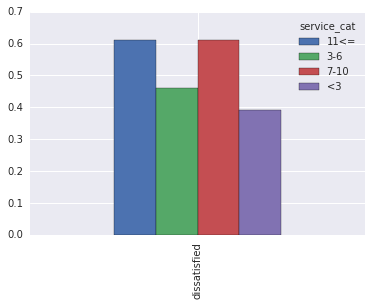

In [45]:
dete_table.plot(kind='bar')

In [41]:
tafe_table = pd.pivot_table(tafe_resignations, columns='service_cat', values='dissatisfied')

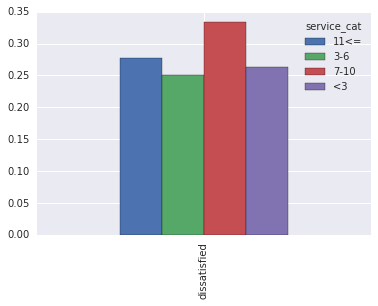

In [42]:
tafe_table.plot(kind='bar')

Contrary to the initial assumption, workers who have been with the company for seven years or more are more likely to resign due to dissatisfaction. The TAFE dataset shows that employees there for three years or less were more likely to be dissatisfied upon resigning than employees there for three to six years, while the newest employees were among the least dissatisfied in the DETE dataset.